# Import Dependencies

In [33]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve, roc_auc_score

sns.set()

# load data set

In [4]:
data=pd.read_csv(r"C:\Users\AK\Desktop\file\Academic.csv")
data.head(30)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [5]:
data.columns


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [6]:
data.shape

(480, 17)

In [12]:
data.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [7]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

<Axes: xlabel='Semester', ylabel='count'>

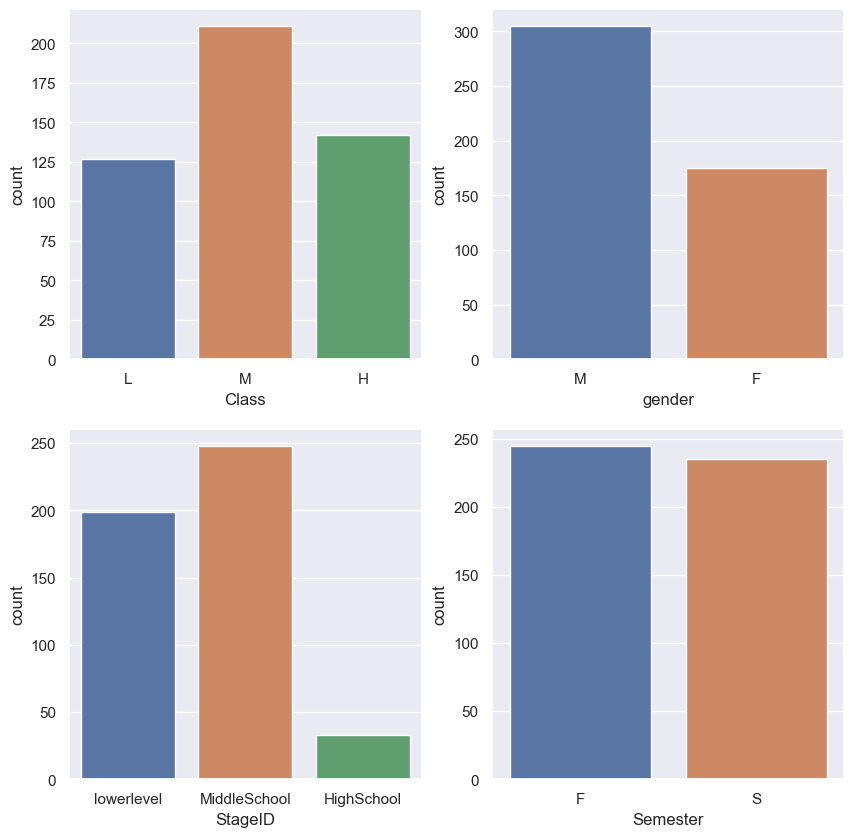

In [8]:

fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class', data=data, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='StageID', data=data, ax=axarr[1,0])
sns.countplot(x='Semester', data=data, ax=axarr[1,1])

<Axes: xlabel='NationalITy', ylabel='count'>

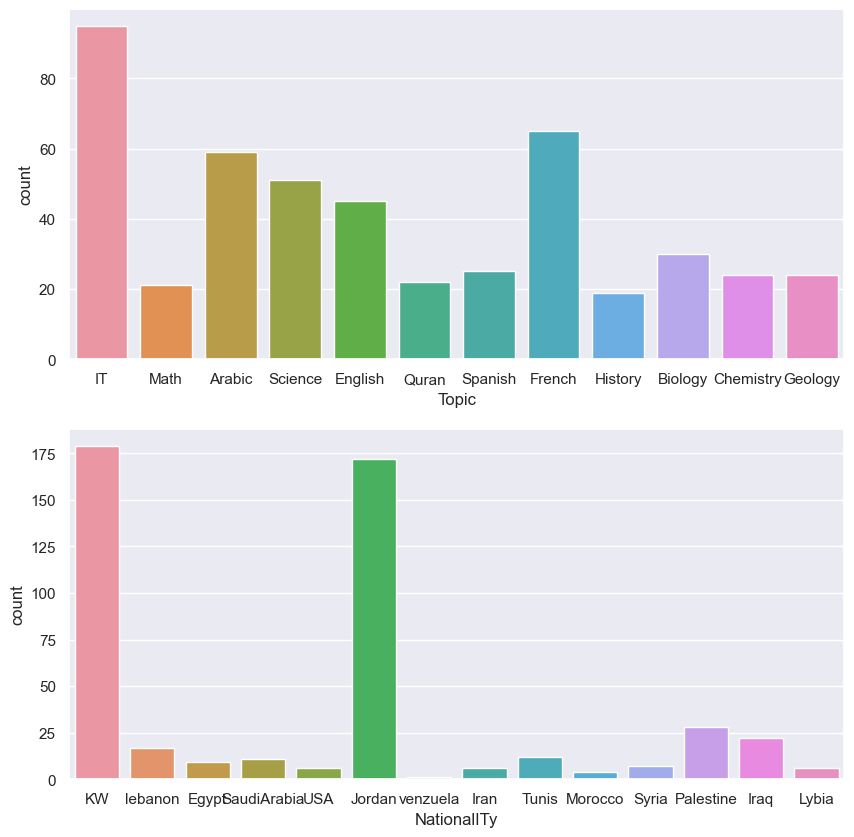

In [15]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', data=data, ax=axis1)
sns.countplot(x='NationalITy', data=data, ax=axis2)

#2. Look at some categorical features in relation to each other, to see what insights could be possibly read

<Axes: xlabel='gender', ylabel='count'>

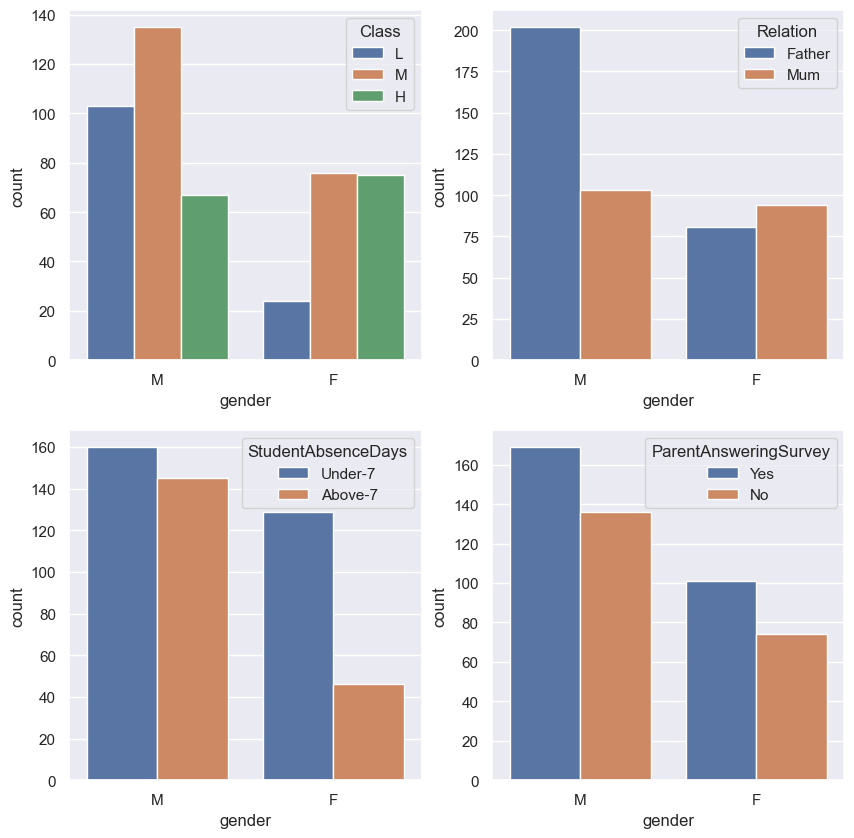

In [9]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='gender', hue='Class', data=data, ax=axarr[0,0], order=['M','F'], hue_order=['L','M','H'])
sns.countplot(x='gender', hue='Relation', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=data, ax=axarr[1,0], order=['M','F'])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=data, ax=axarr[1,1], order=['M','F'])

<Axes: xlabel='NationalITy', ylabel='count'>

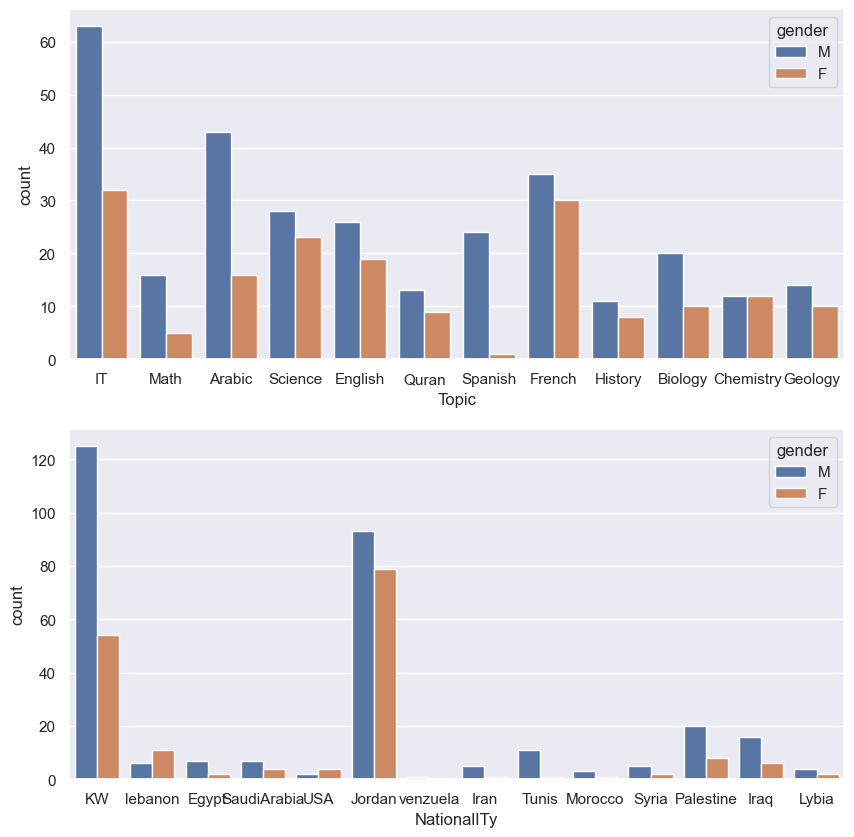

In [13]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', hue='gender', data=data, ax=axis1)
sns.countplot(x='NationalITy', hue='gender', data=data, ax=axis2)

#3. Visualize categorical variables with numerical variables and give conclusions?


<Axes: xlabel='Class', ylabel='Discussion'>

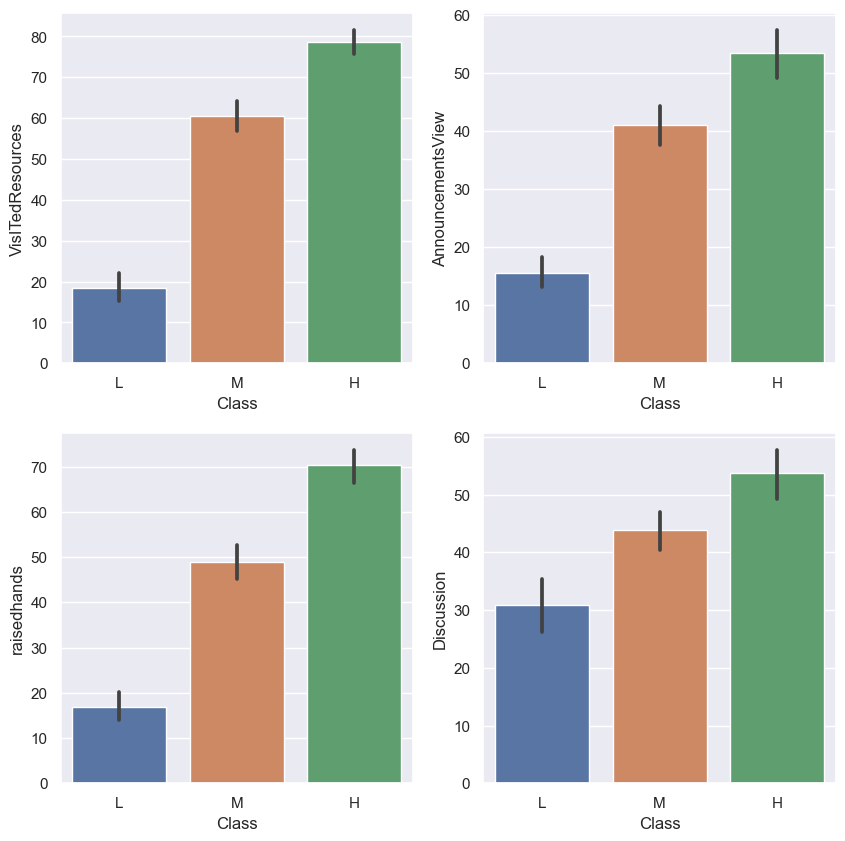

In [10]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=data, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axarr[1,1])

<Axes: xlabel='Semester', ylabel='AnnouncementsView'>

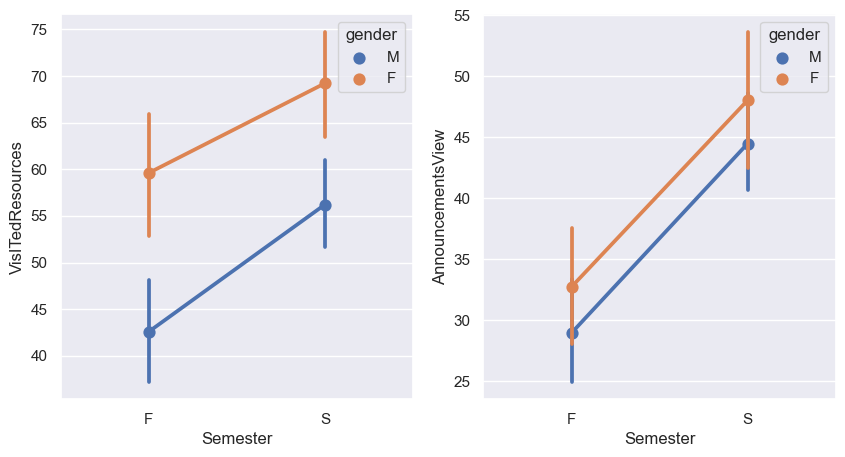

In [18]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=data, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=data, ax=axis2)


In [11]:
ave_raisedhands = sum(data['raisedhands'])/len(data['raisedhands'])
ave_VisITedResources = sum(data['VisITedResources'])/len(data['VisITedResources'])
ave_AnnouncementsView = sum(data['AnnouncementsView'])/len(data['AnnouncementsView'])
unsuccess = data.loc[(data['raisedhands'] >= ave_raisedhands) & (data['VisITedResources']>=ave_VisITedResources) & (data['AnnouncementsView']>=ave_AnnouncementsView)  & (data['Class'] == 'L')]


In [12]:
unsuccess

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L


#From the above result, what are the factors that leads to get low grades of the students?

In [13]:
data['numeric_class'] = [1 if data.loc[i,'Class'] == 'L' else 2 if data.loc[i,'Class'] == 'M' else 3 for i in range(len(data))]

In [14]:
grade_male_ave = sum(data[data.gender == 'M'].numeric_class)/float(len(data[data.gender == 'M']))
grade_female_ave = sum(data[data.gender == 'F'].numeric_class)/float(len(data[data.gender == 'F']))


#Gender comparison cannot completely explain low level grades

Jordan average: 2.0930232558139537


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'KW'),
  Text(1, 0, 'lebanon'),
  Text(2, 0, 'Egypt'),
  Text(3, 0, 'SaudiArabia'),
  Text(4, 0, 'USA'),
  Text(5, 0, 'Jordan'),
  Text(6, 0, 'venzuela'),
  Text(7, 0, 'Iran'),
  Text(8, 0, 'Tunis'),
  Text(9, 0, 'Morocco'),
  Text(10, 0, 'Syria'),
  Text(11, 0, 'Palestine'),
  Text(12, 0, 'Iraq'),
  Text(13, 0, 'Lybia')])

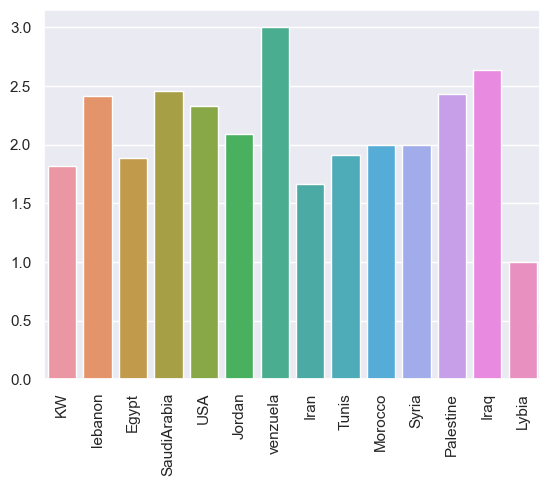

In [15]:
 # Now lets look at nationality
nation = data.NationalITy.unique()
nation_grades_ave = [sum(data[data.NationalITy == i].numeric_class)/float(len(data[data.NationalITy == i])) for i in nation]
ax = sns.barplot(x=nation, y=nation_grades_ave)
jordan_ave = sum(data[data.NationalITy == 'Jordan'].numeric_class)/float(len(data[data.NationalITy == 'Jordan']))
print('Jordan average: '+str(jordan_ave))
plt.xticks(rotation=90)

 #As it can be seen in bar plot Jordan is seventh country with average 2.09 so 'Jordan' has positive impact on these two students actually


Text(0.5, 1.0, 'Relation with father or mother affects success of students')

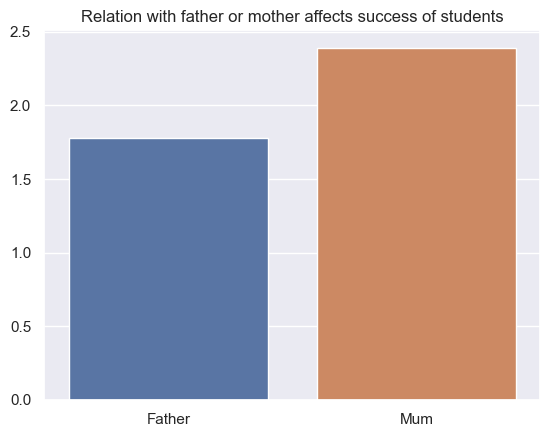

In [16]:
# Lets look at relation with family members
relation = data.Relation.unique()
relation_grade_ave = [sum(data[data.Relation == i].numeric_class)/float(len(data[data.Relation == i])) for i in relation]
ax = sns.barplot(x=relation, y=relation_grade_ave)
plt.title('Relation with father or mother affects success of students')

#Having relation with mum has positive effect on these students

Text(0.5, 1.0, 'Discussion group participation')

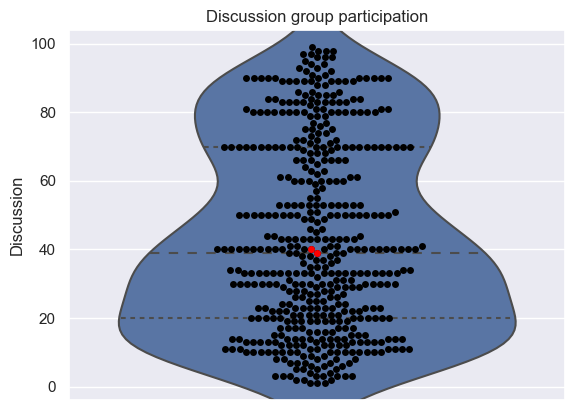

In [17]:
#Lets look at how many times the student participate on discussion groups
discussion = data.Discussion
discussion_ave = sum(discussion)/len(discussion)
ax = sns.violinplot(y=discussion,split=True,inner='quart')
ax = sns.swarmplot(y=discussion,color='black')
ax = sns.swarmplot(y = unsuccess.Discussion, color='red')
plt.title('Discussion group participation')


Text(0.5, 1.0, 'Absence effect on success')

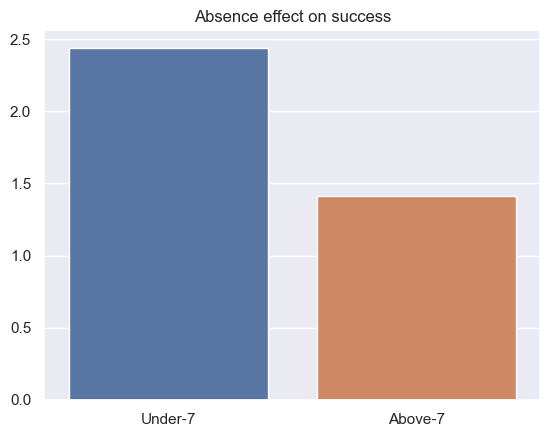

In [29]:
# Now lastly lets look at
absence_day = data.StudentAbsenceDays.unique()
absense_day_ave = [sum(data[data.StudentAbsenceDays == i].numeric_class)/float(len(data[data.StudentAbsenceDays == i])) for i in absence_day]
ax = sns.barplot(x=absence_day, y=absense_day_ave)
plt.title('Absence effect on success')


#These two students are under the average of discussion (43). Therefore, not participating in discussion groups can be important reason to get low grades
Their absence days are above seven which resulted in low grades

5. #Build classification model and present it's classification report

In [18]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,2


In [19]:
data1 = data.drop('Class',axis = 1)
data_with_dummies = pd.get_dummies(data1, drop_first=True)

In [20]:
data_with_dummies.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,numeric_class,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,2,True,False,False,False,True,...,True,False,False,False,False,False,False,True,True,True
1,20,20,3,25,2,True,False,False,False,True,...,True,False,False,False,False,False,False,True,True,True
2,10,7,0,30,1,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
3,30,25,5,35,1,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
4,40,50,12,50,2,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False


In [44]:
Features = data_with_dummies.drop(['numeric_class'],axis = 1)
Target = data_with_dummies['numeric_class']


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Features)


StandardScaler()

In [23]:
X = scaler.fit_transform(Features)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size=0.3, random_state=45)


In [25]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

LogisticRegression()

In [34]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)
cm = confusion_matrix(y_test, Prediction)
Probabilities = Logit_Model.predict_proba(X_test)[:, 1]  # Assuming it's binary classification, take the probabilities of the positive class



In [35]:
Prediction

array([2, 2, 3, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3, 3,
       2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 1, 3, 2, 1,
       2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 3, 3, 3, 3,
       2, 3, 2, 1, 2, 1, 3, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2, 2, 3, 2, 2, 1,
       3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3,
       3, 3, 2, 1, 1, 1, 3, 2, 2, 1, 2, 2], dtype=int64)

In [36]:
Score

0.7361111111111112

In [37]:
 cm

array([[26,  3,  1],
       [ 8, 52, 14],
       [ 0, 12, 28]], dtype=int64)

In [38]:
Probabilities 

array([8.67539881e-01, 5.96783415e-01, 3.58822773e-01, 1.11133606e-03,
       5.71799497e-03, 1.10052384e-01, 3.28979789e-01, 1.75007248e-04,
       6.10513971e-01, 5.78649003e-01, 9.95603619e-01, 1.48835082e-01,
       5.07306982e-01, 7.13718024e-01, 3.80360514e-01, 8.99942041e-02,
       3.75357927e-01, 8.03943697e-01, 1.51216737e-01, 5.28566492e-02,
       1.05402309e-01, 1.38470628e-02, 9.35632627e-01, 1.53195164e-01,
       5.64640056e-01, 9.93662023e-01, 1.53373906e-01, 8.87118699e-01,
       5.79038284e-01, 2.86192020e-05, 5.27277714e-02, 1.50824180e-01,
       4.74132138e-01, 9.84830332e-01, 6.45313890e-01, 9.84451394e-01,
       3.61931309e-02, 7.02763676e-01, 9.90488277e-01, 4.00406398e-03,
       4.47660598e-01, 1.53232305e-01, 9.32839606e-01, 3.84981493e-03,
       7.74676041e-01, 8.69512808e-01, 4.96555732e-01, 6.98554752e-01,
       9.49520077e-01, 9.92736152e-01, 8.29711772e-01, 1.36852110e-01,
       7.61706561e-01, 8.06611737e-01, 9.98676210e-01, 5.43761181e-01,
      

In [30]:
print(Report)

              precision    recall  f1-score   support

           1       0.76      0.87      0.81        30
           2       0.78      0.70      0.74        74
           3       0.65      0.70      0.67        40

    accuracy                           0.74       144
   macro avg       0.73      0.76      0.74       144
weighted avg       0.74      0.74      0.74       144



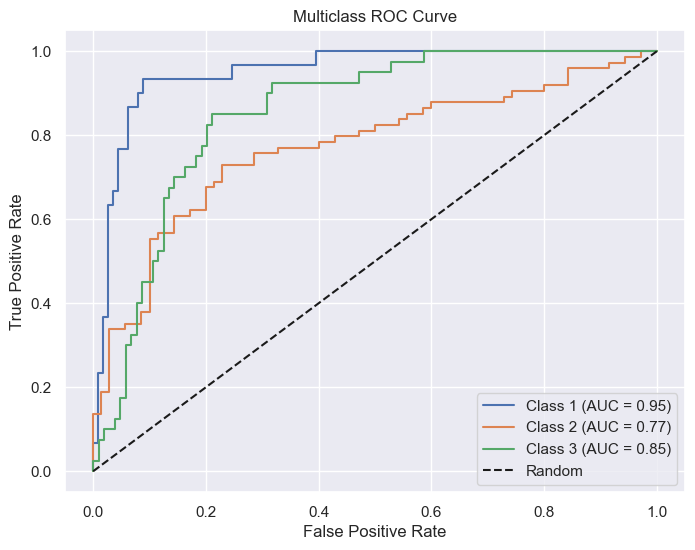

In [41]:
 from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Assuming 'Logit_Model' is your logistic regression model
Prediction = Logit_Model.predict(X_test)
Probabilities = Logit_Model.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], Probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i + 1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

#Class 1 (AUC = 0.95):

#A high AUC value (close to 1) for Class 1 suggests that the logistic regression model performs very well in distinguishing between instances of Class 1 and the rest. The ROC curve for Class 1 likely demonstrates a high true positive rate (sensitivity) and a low false positive rate across various decision thresholds.

#Class 2 (AUC = 0.77):

#A moderate AUC value (between 0.5 and 1) for Class 2 indicates that the model's ability to discriminate between instances of Class 2 and the rest is decent but not as strong as for Class 1. The ROC curve for Class 2 might not reach as high in the true positive rate, or it may have a higher false positive rate at certain thresholds.

#Class 3 (AUC = 0.85):

#An AUC value of 0.85 for Class 3 suggests that the model performs well in distinguishing between instances of Class 3 and the rest. The ROC curve for Class 3 likely exhibits a good balance between true positive rate and false positive rate.

In [38]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
print(" Naive Bayes accuracy : {:.2f}%".format(nb.score(X_test,y_test)*100))

 Naive Bayes accuracy : 37.50%


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train, y_train)
print("Random Forest Classifier accuracy: {:.2f}%".format(rf.score(X_test, y_test) * 100))

Random Forest Classifier accuracy: 75.00%


In [51]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 330.3 kB/s eta 0:05:02
   ---------------------------------------- 0.1/99.8 MB 327.7 kB/s eta 0:05:05
   ---------------------------------------- 0.2/99.8 MB 833.5 kB/s eta 0:02:00
   ---------------------------------------- 0.3/99.8 MB 1.1 MB/s eta 0:01:28
   ---------------------------------------- 0.5/99.8 MB 1.8 MB/s eta 0:00:57
   ---------------------------------------- 0.7/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.9/99.8 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 1.0/99.8 MB 2.1 MB/s eta 0:00:47
    -----------------------------

In [41]:
# Convert class labels to start from 0
y_train_encoded = y_train - 1
y_test_encoded = y_test - 1

# Create and fit the XGBoost classifier
import xgboost
xg = xgboost.XGBClassifier()
xg.fit(X_train, y_train_encoded)

# Evaluate the accuracy
print("XGboost accuracy: {:.2f}%".format(xg.score(X_test, y_test_encoded) * 100))

XGboost accuracy: 72.92%


##
The Random Forest Classifier showed the highest accuracy at 75.00%, indicating better overall performance compared to XGBoost with 72.92% accuracy. However, Naive Bayes had a lower accuracy at 37.50%, suggesting it may not be as effective for this particular task.